# Analisis de datos


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("datos_analisis.csv")


### Sobre el número total de articulos:
**¿Cuál es el número total de articulos recopiladas?**

In [126]:
num_filas = data.shape[0]
print(f"El numero total es {num_filas}")

El numero total es 719


### Número de articulos por mes:
- **¿Cuántos articulos se publicaron cada mes?**
- **¿Cuál fue el mes con más y menos articulos publicadas?**

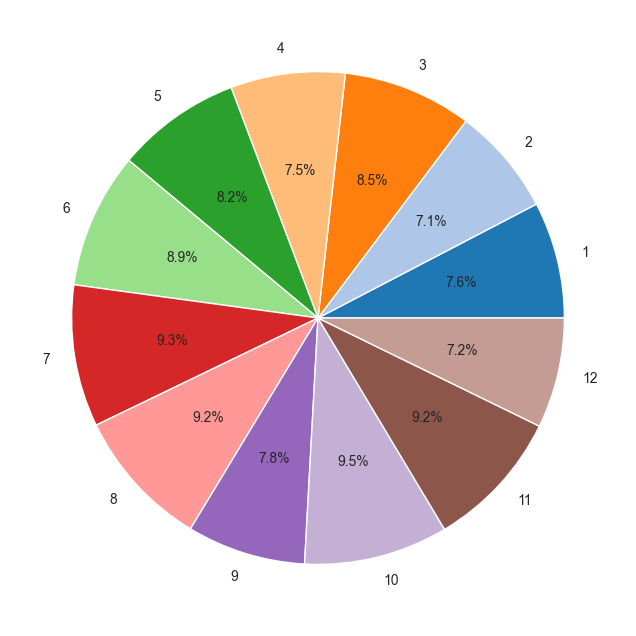

Mes
1     55
2     51
3     61
4     54
5     59
6     64
7     67
8     66
9     56
10    68
11    66
12    52
Name: count, dtype: int64
Mes con mayor articulos: 10 
Mes con menor articulos: 2


In [127]:
df_month = pd.DataFrame(data)

df_month["Fecha"] = pd.to_datetime(df_month["Fecha"], format = "%d/%m/%Y")
df_month["Mes"] = df_month["Fecha"].dt.month

count_month = df_month["Mes"].value_counts().sort_index()
max_article = count_month.idxmax()
min_article = count_month.idxmin()

plt.figure(figsize=(8,8))
plt.pie(count_month, labels=count_month.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.show()

print(count_month)
print(f"Mes con mayor articulos: {max_article} \nMes con menor articulos: {min_article}")

### Longitud del contenido en palabras:
- **¿Cuál es la distribución de las longitudes de los articulos en palabras?**
- **¿Cuál es la longitud promedio de los articulos?**

El promedio es: 290.7287899860918


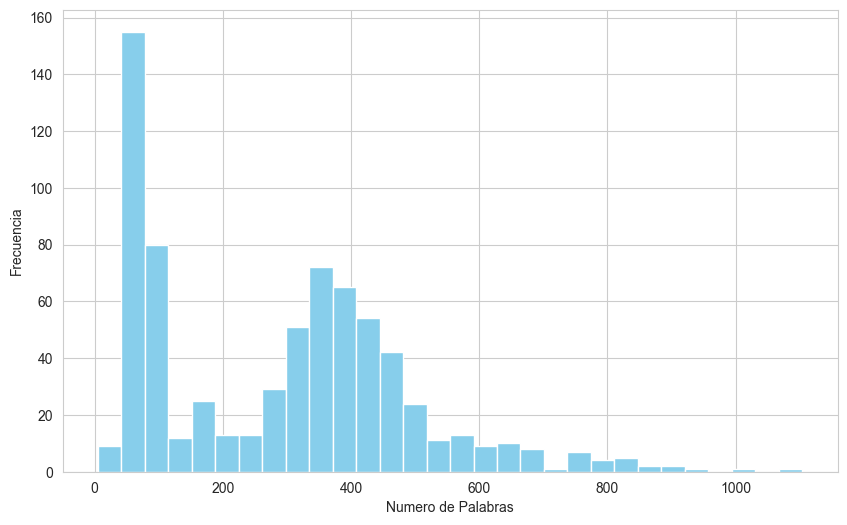

(-0.001, 200.0]    288
(200.0, 400.0]     222
(400.0, 600.0]     161
(600.0, 800.0]      35
(800.0, 1000.0]     11
(1000.0, inf]        2
Name: count, dtype: int64

In [214]:
df_len = pd.DataFrame(data)

def count_word(fila):
    return len(fila["Contenido"].split())

df_len["Total_Palabras"] = df_len.apply(count_word, axis = 1)

promedio = df_len["Total_Palabras"].mean()
print(f"El promedio es: {promedio}")

plt.figure(figsize=(10,6))
plt.hist(df_len["Total_Palabras"], bins=30, color="skyblue")

plt.xlabel("Numero de Palabras")
plt.ylabel("Frecuencia")
plt.show()

df_len["Total_Palabras"].value_counts(bins=[0, 200, 400, 600, 800, 1000, float('inf')])


### Palabras comunes:
**¿Cuáles son las 10 palabras más frecuentes en los articulos?**

In [213]:
df_word = pd.DataFrame(data)

words = " ".join(df_word["Contenido"]).split()
sr_word = pd.Series(words)
count_word = sr_word.value_counts()

count_word[:10]


u         23994
tu         5336
ku         4427
ti’        4332
yéetel     3930
le         3700
ti’al      3157
tumen      3064
yaan       2486
ma’        2037
Name: count, dtype: int64

### Ubicación de los articulos:
- **¿Cuáles son las ubicaciones más mencionadas en los articulos?**
- **¿Existen patrones geográficos claros en las noticias publicadas?**

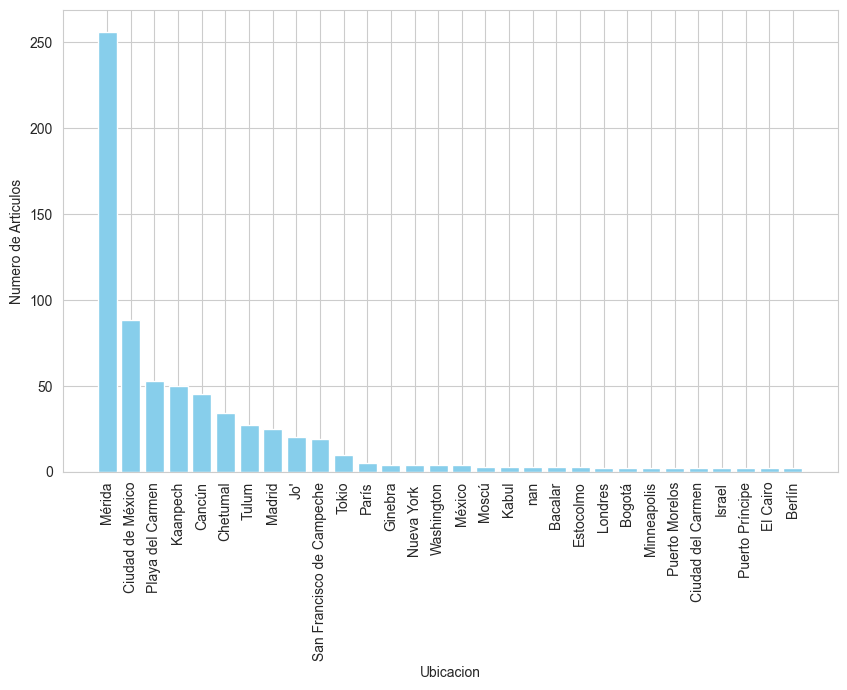

In [212]:
df_location = pd.DataFrame(data)

def get_city(location):
    return str(location).split(",")[0]

df_location["Ubicacion"] = df_location["Ubicacion"].apply(get_city)
count_location = df_location["Ubicacion"].value_counts()[:30]

plt.figure(figsize=(10, 6))
plt.bar(count_location.index, count_location.values, color="skyblue")

plt.xticks(rotation=90)
plt.xlabel("Ubicacion")
plt.ylabel("Numero de Articulos")
plt.show()

### Análisis del traductor maya-español:
- **¿Cuántas palabras en las noticias están escritas en maya?**
- **¿Cuántas palabras provienen del español?**
- **¿Existen palabras que aparecen tanto en maya como en español?**